In [1]:
# code modified to https://www.hatarilabs.com/ih-en/how-to-make-a-piper-diagram-in-python-tutorial
%matplotlib inline
import pandas as pd
import numpy as np
import os, math
import matplotlib.pyplot as plt
import imageio

In [2]:
#nos dirigimos al sitio del formato
img = imageio.imread("../Figures/PiperCompleto.png")

In [3]:
#importamos los datos
datosQuimica = pd.read_excel('../Xls/HidroquimicaIglesia.xlsx')
datosQuimica.head()

,Estacion,EposgarF2,NposgarF2,Localidad,Tipo de fuente,Nombre de la fuente o Propietario,T. agua°C,SDC mg/l,CE µS/cm,pH,...,Mn,F,B,Li,Ni,Sr,Cd,Zn,Cu,Co
0,71,2.477913e+06,6.650910e+06,Pismanta,VERTIENTE,BAÑOS DE PISMANTA,43.5,315,561,9.2,...,0.010,2.2,1.20,0.217,0.040,0.000,ND,0.017,ND,0.052
1,70,2.477508e+06,6.649167e+06,Pismanta,VERTIENTE,TERMAS DEL CENTENARI,36.0,279,470,8.9,...,0.013,1.6,0.60,0.139,0.033,0.000,ND,0.019,ND,0.042
2,44,2.476156e+06,6.651523e+06,Pismanta,POZO,NO IDENTIFICADA,16.0,225,380,7.4,...,0.019,0.7,0.30,0.057,0.043,0.000,ND,0.023,ND,0.058
3,98,2.477246e+06,6.645446e+06,Las Flores,POZO,GENDARMERIA,16.8,274,415,6.8,...,0.016,0.6,0.30,0.005,0.037,0.217,ND,0.068,ND,0.054
4,99,2.476523e+06,6.646104e+06,Las Flores,POZO,NO IDENTIFICADA,16.1,79,117,6.6,...,0.028,0.5,0.08,-0.004,0.035,0.105,ND,0.024,ND,0.045


In [4]:
#diccionario de iones divido valencia
iones = {
'HCO3': 61.0168, 'CO3' : 60/2, 'Cl' : 35.453, 'SO4': 96.06/2,
'Na' : 23, 'Ca' : 40.078/2, 'Mg' : 24.035/2, 'K'  : 39.0983
}

#generamos las columnas de concentraciones equivalentes
for ion in iones.keys():
    datosQuimica[str(ion)+'_meq'] = datosQuimica[ion]/iones[ion]
    
datosQuimica.head()


,Estacion,EposgarF2,NposgarF2,Localidad,Tipo de fuente,Nombre de la fuente o Propietario,T. agua°C,SDC mg/l,CE µS/cm,pH,...,Cu,Co,HCO3_meq,CO3_meq,Cl_meq,SO4_meq,Na_meq,Ca_meq,Mg_meq,K_meq
0,71,2.477913e+06,6.650910e+06,Pismanta,VERTIENTE,BAÑOS DE PISMANTA,43.5,315,561,9.2,...,ND,0.052,0.704724,0.700000,0.761572,2.727462,4.695652,0.019961,0.133139,0.035807
1,70,2.477508e+06,6.649167e+06,Pismanta,VERTIENTE,TERMAS DEL CENTENARI,36.0,279,470,8.9,...,ND,0.042,0.753891,0.213333,0.592334,2.623360,4.304348,0.000000,0.000000,0.025577
2,44,2.476156e+06,6.651523e+06,Pismanta,POZO,NO IDENTIFICADA,16.0,225,380,7.4,...,ND,0.058,1.147225,0.000000,0.733365,1.686446,2.913043,0.598832,0.158103,0.033250
3,98,2.477246e+06,6.645446e+06,Las Flores,POZO,GENDARMERIA,16.8,274,415,6.8,...,ND,0.054,1.966671,0.000000,0.507714,2.123673,1.347826,2.844453,0.224672,0.048595
4,99,2.476523e+06,6.646104e+06,Las Flores,POZO,NO IDENTIFICADA,16.1,79,117,6.6,...,ND,0.045,1.065280,0.000000,0.366683,0.052051,0.695652,0.489046,0.083212,0.089518


In [5]:
# calcula el error 
datosQuimica['antiones'] = datosQuimica['SO4_meq'] + datosQuimica['HCO3_meq'] + datosQuimica['Cl_meq']+datosQuimica['CO3_meq']
datosQuimica['cantiones'] =datosQuimica['Mg_meq'] +datosQuimica['Na_meq'] +   datosQuimica['Ca_meq'] + datosQuimica['K_meq']
datosQuimica['error'] = (datosQuimica['antiones'] - datosQuimica['cantiones'])/(datosQuimica['antiones'] + datosQuimica['cantiones'])
datosQuimica.head()

,Estacion,EposgarF2,NposgarF2,Localidad,Tipo de fuente,Nombre de la fuente o Propietario,T. agua°C,SDC mg/l,CE µS/cm,pH,...,CO3_meq,Cl_meq,SO4_meq,Na_meq,Ca_meq,Mg_meq,K_meq,antiones,cantiones,error
0,71,2.477913e+06,6.650910e+06,Pismanta,VERTIENTE,BAÑOS DE PISMANTA,43.5,315,561,9.2,...,0.700000,0.761572,2.727462,4.695652,0.019961,0.133139,0.035807,4.893758,4.884560,0.000941
1,70,2.477508e+06,6.649167e+06,Pismanta,VERTIENTE,TERMAS DEL CENTENARI,36.0,279,470,8.9,...,0.213333,0.592334,2.623360,4.304348,0.000000,0.000000,0.025577,4.182918,4.329924,-0.017269
2,44,2.476156e+06,6.651523e+06,Pismanta,POZO,NO IDENTIFICADA,16.0,225,380,7.4,...,0.000000,0.733365,1.686446,2.913043,0.598832,0.158103,0.033250,3.567036,3.703228,-0.018733
3,98,2.477246e+06,6.645446e+06,Las Flores,POZO,GENDARMERIA,16.8,274,415,6.8,...,0.000000,0.507714,2.123673,1.347826,2.844453,0.224672,0.048595,4.598059,4.465547,0.014620
4,99,2.476523e+06,6.646104e+06,Las Flores,POZO,NO IDENTIFICADA,16.1,79,117,6.6,...,0.000000,0.366683,0.052051,0.695652,0.489046,0.083212,0.089518,1.484014,1.357428,0.044550


In [6]:
#normalizamos los aniones
datosQuimica['SO4_norm'] = datosQuimica['SO4_meq'] / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100
datosQuimica['HCO3_CO3_norm'] = (datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']) / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100
datosQuimica['Cl_norm'] = datosQuimica['Cl_meq'] / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100

#normalizamos los cationes
datosQuimica['Mg_norm'] = datosQuimica['Mg_meq'] / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100
datosQuimica['Na_K_norm'] = (datosQuimica['K_meq']+datosQuimica['Na_meq']) / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100
datosQuimica['Ca_norm'] = datosQuimica['Ca_meq'] / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100
datosQuimica.head()
datosQuimica.to_excel('../Output/datosmeq.xls')

In [7]:
#funcion de las coordenadas
def coordenada(Ca,Mg,Cl,SO4,Label):
    xcation = 40 + 360 - (Ca + Mg / 2) * 3.6
    ycation = 40 + (math.sqrt(3) * Mg / 2)* 3.6
    xanion = 40 + 360 + 100 + (Cl + SO4 / 2) * 3.6
    yanion = 40 + (SO4 * math.sqrt(3) / 2)* 3.6
    xdiam = 0.5 * (xcation + xanion + (yanion - ycation) / math.sqrt(3))
    ydiam = 0.5 * (yanion + ycation + math.sqrt(3) * (xanion - xcation))
    #print(str(xanion) + ' ' + str(yanion))
    c=np.random.rand(3,1).ravel()
    c = np.sort(c)
    listagraph=[]
    listagraph.append(plt.scatter(xcation,ycation,zorder=1,c=c, s=60, edgecolors='#4b4b4b',label=Label))
    listagraph.append(plt.scatter(xanion,yanion,zorder=1,c=c, s=60, edgecolors='#4b4b4b'))
    listagraph.append(plt.scatter(xdiam,ydiam,zorder=1,c=c, s=60, edgecolors='#4b4b4b'))
    return listagraph

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

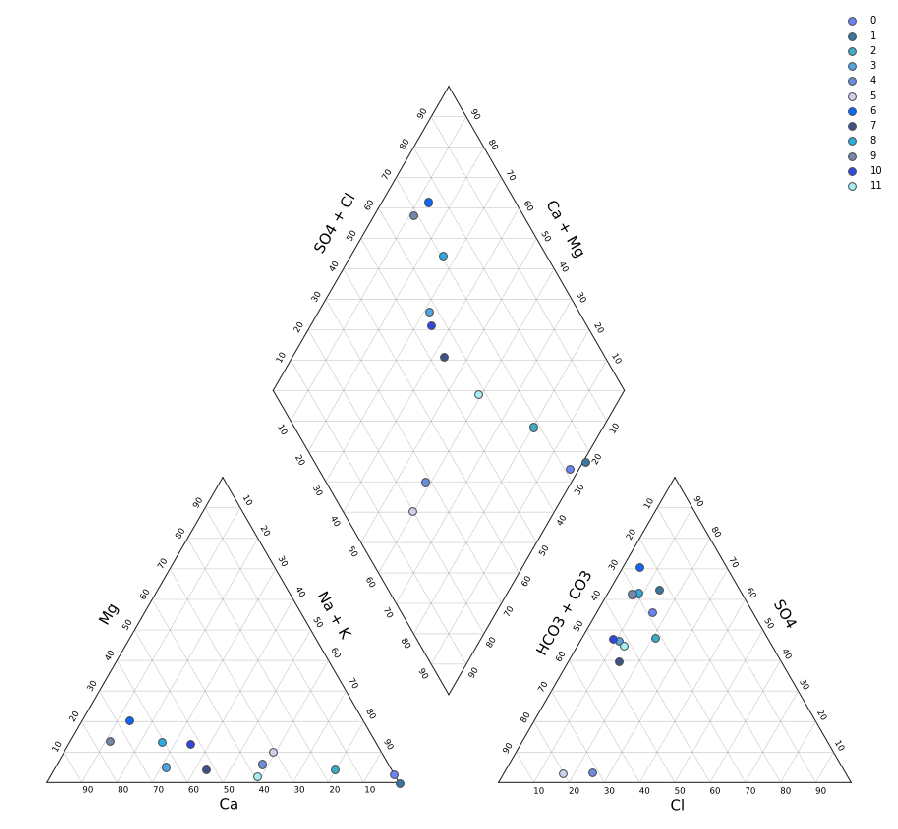

In [8]:
plt.figure(figsize=(20,15))
plt.imshow(np.flipud(img),zorder=0)
for index, row in datosQuimica.iterrows():
    coordenada(row['Ca_norm'],row['Mg_norm'],row['Cl_norm'],row['SO4_norm'],index)
plt.ylim(0,830)
plt.xlim(0,900)
plt.axis('off')
plt.legend(loc='upper right',prop={'size':10}, frameon=False, scatterpoints=1)

plt.savefig('../Output/Piper.png')
plt.savefig('../Output/Piper.pdf')
plt.savefig('../Output/Piper.svg')